In [681]:
import tensorflow as tf
import os
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as pyplot
import numpy as np 


Load the Training Dataset
By: Mohnish Sai Prasad

In [682]:
train_data = []
train_label = []

path_train = "/Users/reren/Documents/IdentiFire/Train_Data"

for file_name in os.listdir(path_train):
    label = file_name.split("_")[0]
    img = cv2.imread(os.path.join(path_train,file_name))

    #in case of corrupt file
    if img is None:
        continue
        
    img = cv2.resize(img, (100,100))
    train_data.append(img)
    train_label.append(label)


In [683]:
train_data = np.array(train_data)
train_label = np.array(train_label)

In [684]:
train_data.shape

(4609, 100, 100, 3)

In [685]:
train_label.shape

(4609,)

Load the Test Dataset By: Ahmed Saied

In [686]:
test_data = []
test_label = []

path_test = "/Users/reren/Documents/IdentiFire/Test_Data"

for file_name in os.listdir(path_test):
    label = file_name.split(".")[0]

    #test data is labeled differently
    # match label to what the training set is for consistency
    if label == 'fire':
        label = 'f'
    else:
        label = 'nf'

    img = cv2.imread(os.path.join(path_test,file_name))
    
    #in case of corrupt file
    if img is None:
        continue

    img = cv2.resize(img, (100,100))
    test_data.append(img)
    test_label.append(label)


In [687]:
test_data = np.array(test_data)
test_data.shape
test_label = np.array(test_label)

In [688]:
test_data.shape

(998, 100, 100, 3)

Plot some images to look at.
Use this later when checking wrong predictions

In [689]:
def plot_sample(X, y, index):
    pyplot.figure(figsize = (20,5))
    pyplot.imshow(X[index])
    pyplot.xlabel(y[index])

Normalize Data by diving by 255. OpenCV uses BRG, not RGB. Each image has 3 channels (Blue, Green, Red), each can range from 0-255. 

In [690]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Encode label. (Fire = 0; Non_fire = 1)

In [691]:
le = preprocessing.LabelEncoder()
train_label = le.fit_transform(train_label)
test_label = le.fit_transform(test_label)

In [692]:
train_label[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Split the training and validation up

In [693]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.2, shuffle= True)

Create a CNN

In [694]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

Train the model

In [695]:
model = prepare_model()
model.fit(x_train, y_train, batch_size=256, epochs=5, shuffle=True, validation_data=(x_val, y_val))

Epoch 1/5
15/15 [==============================] - 8s 475ms/step - loss: 0.7846 - accuracy: 0.6686 - val_loss: 0.4193 - val_accuracy: 0.8265
Epoch 2/5
15/15 [==============================] - 7s 456ms/step - loss: 0.3316 - accuracy: 0.8573 - val_loss: 0.3253 - val_accuracy: 0.8633
Epoch 3/5
15/15 [==============================] - 7s 479ms/step - loss: 0.2510 - accuracy: 0.8904 - val_loss: 0.3093 - val_accuracy: 0.8948
Epoch 4/5
15/15 [==============================] - 7s 465ms/step - loss: 0.2169 - accuracy: 0.9078 - val_loss: 0.2861 - val_accuracy: 0.8970
Epoch 5/5
15/15 [==============================] - 7s 459ms/step - loss: 0.1945 - accuracy: 0.9203 - val_loss: 0.2689 - val_accuracy: 0.9046


Test the Model

In [696]:
model.evaluate(test_data,test_label, batch_size=64)

16/16 [==============================] - 1s 32ms/step - loss: 0.1828 - accuracy: 0.9188


[0.18284474313259125, 0.9188376665115356]

In [697]:
pred = model.predict(test_data)

#trnasfomr the predction of model to binary
pred = np.transpose(pred)[0]
pred = list(map(lambda x: 0 if x<0.5 else 1, pred))

#transfrom it back to f or nf to read
pred = le.inverse_transform(pred)
test_label = le.inverse_transform(test_label)
pred[:5]

array(['f', 'f', 'f', 'f', 'f'], dtype='<U2')

Dictionary created to find the index easily. Index will be used to see the image that was predicted.

In [698]:
check = {}

for count,i in enumerate(pred):
    check[count] = i


In [699]:
print(check)

{0: 'f', 1: 'f', 2: 'f', 3: 'f', 4: 'f', 5: 'f', 6: 'f', 7: 'f', 8: 'nf', 9: 'f', 10: 'f', 11: 'f', 12: 'f', 13: 'nf', 14: 'nf', 15: 'f', 16: 'f', 17: 'f', 18: 'f', 19: 'f', 20: 'f', 21: 'f', 22: 'f', 23: 'f', 24: 'f', 25: 'f', 26: 'f', 27: 'f', 28: 'f', 29: 'nf', 30: 'f', 31: 'f', 32: 'nf', 33: 'f', 34: 'f', 35: 'f', 36: 'f', 37: 'nf', 38: 'f', 39: 'f', 40: 'f', 41: 'f', 42: 'f', 43: 'f', 44: 'f', 45: 'nf', 46: 'f', 47: 'f', 48: 'f', 49: 'nf', 50: 'f', 51: 'f', 52: 'f', 53: 'f', 54: 'f', 55: 'f', 56: 'f', 57: 'f', 58: 'f', 59: 'f', 60: 'f', 61: 'f', 62: 'f', 63: 'f', 64: 'f', 65: 'f', 66: 'f', 67: 'f', 68: 'f', 69: 'f', 70: 'f', 71: 'f', 72: 'f', 73: 'f', 74: 'f', 75: 'f', 76: 'f', 77: 'f', 78: 'f', 79: 'f', 80: 'f', 81: 'f', 82: 'f', 83: 'f', 84: 'f', 85: 'f', 86: 'f', 87: 'f', 88: 'f', 89: 'f', 90: 'f', 91: 'f', 92: 'f', 93: 'f', 94: 'f', 95: 'nf', 96: 'f', 97: 'f', 98: 'f', 99: 'f', 100: 'f', 101: 'f', 102: 'f', 103: 'f', 104: 'f', 105: 'f', 106: 'f', 107: 'nf', 108: 'f', 109: 'f',

Plot images to check what the model got wrong.

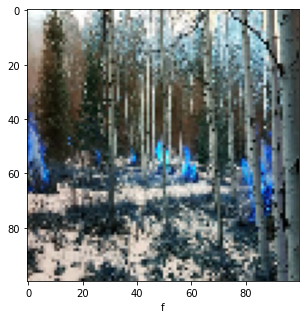

In [701]:
plot_sample(test_data, test_label, 8)